In [1]:
import numpy as np
from dscribe.descriptors import SOAP
import matplotlib.pyplot as plt
import ase.io.gromacs as gmx
from seaborn import kdeplot

Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np
import tqdm.auto as tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [3]:
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
os.chdir("/home/dibyendu/DM_Projects/SolOrder/SolOrder/")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
species = ["H", "O"]
r_cut = 6.0
n_max = 7
l_max = 7

# Setting up the SOAP descriptor
soap = SOAP(
    species=[1,8],
    periodic=True,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
    average = 'off',
    rbf='gto',
)

In [6]:
soap.get_number_of_features()

840

In [8]:
ice1h = gmx.read_gromacs("../../Sample_Structures/Ice/ice1h.gro")
del ice1h[[atom.symbol=="W" for atom in ice1h]] 
liquid = gmx.read_gromacs("../../Sample_Structures/Ice/liquid.gro")
del liquid[[atom.symbol=="W" for atom in liquid]] 
ice1c = gmx.read_gromacs("../../Sample_Structures/Ice/ice1c.gro")
del ice1c[[atom.symbol=="W" for atom in ice1c]] 
ice0 = gmx.read_gromacs("../../Sample_Structures/Ice/ice0.gro")
del ice0[[atom.symbol=="W" for atom in ice0]] 
ice2 = gmx.read_gromacs("../../Sample_Structures/Ice/ice2.gro")
del ice2[[atom.symbol=="W" for atom in ice2]] 
ice3 = gmx.read_gromacs("../../Sample_Structures/Ice/ice3.gro")
del ice3[[atom.symbol=="W" for atom in ice3]] 
ice4 = gmx.read_gromacs("../../Sample_Structures/Ice/ice4.gro")
del ice4[[atom.symbol=="W" for atom in ice4]] 
ice5 = gmx.read_gromacs("../../Sample_Structures/Ice/ice5.gro")
del ice5[[atom.symbol=="W" for atom in ice5]] 
ice6 = gmx.read_gromacs("../../Sample_Structures/Ice/ice6.gro")
del ice6[[atom.symbol=="W" for atom in ice6]] 
ice7 = gmx.read_gromacs("../../Sample_Structures/Ice/ice7.gro")
del ice7[[atom.symbol=="W" for atom in ice7]] 
ice9 = gmx.read_gromacs("../../Sample_Structures/Ice/ice9.gro")
del ice9[[atom.symbol=="W" for atom in ice9]] 
ice12 = gmx.read_gromacs("../../Sample_Structures/Ice/ice12.gro")
del ice12[[atom.symbol=="W" for atom in ice12]] 
iceA = gmx.read_gromacs("../../Sample_Structures/Ice/iceA.gro")
del iceA[[atom.symbol=="W" for atom in iceA]] 
iceB = gmx.read_gromacs("../../Sample_Structures/Ice/iceB.gro")
del iceB[[atom.symbol=="W" for atom in iceB]] 


In [9]:
soap_ih = soap.create(ice1h, positions=np.arange(0,len(ice1h),3),n_jobs = -1)
soap_ic = soap.create(ice1c, positions=np.arange(0,len(ice1c),3),n_jobs = -1)
soap_lq = soap.create(liquid, positions=np.arange(0,len(liquid),3),n_jobs = -1)
soap_0 = soap.create(ice0, positions=np.arange(0,len(ice0),3),n_jobs = -1)
soap_2 = soap.create(ice2, positions=np.arange(0,len(ice2),3),n_jobs = -1)
soap_3 = soap.create(ice3, positions=np.arange(0,len(ice3),3),n_jobs = -1)
soap_4 = soap.create(ice4, positions=np.arange(0,len(ice4),3),n_jobs = -1)
soap_5 = soap.create(ice5, positions=np.arange(0,len(ice5),3),n_jobs = -1)
soap_6 = soap.create(ice6, positions=np.arange(0,len(ice6),3),n_jobs = -1)
soap_7 = soap.create(ice7, positions=np.arange(0,len(ice7),3),n_jobs = -1)
soap_9 = soap.create(ice9, positions=np.arange(0,len(ice9),3),n_jobs = -1)
soap_12 = soap.create(ice12, positions=np.arange(0,len(ice12),3),n_jobs = -1)
soap_A = soap.create(iceA, positions=np.arange(0,len(iceA),3),n_jobs = -1)
soap_B = soap.create(iceB, positions=np.arange(0,len(iceB),3),n_jobs = -1)

In [12]:
from vae import VAE

In [51]:
data = np.concatenate([testsoap_ih, testsoap_0, testsoap_4, testsoap_5, testsoap_6, testsoap_7, testsoap_9, testsoap_12, testsoap_A, testsoap_B, testsoap_ic])

In [13]:
#import numpy as np
#data = np.load("soap_data.npy")

In [52]:
Scaler = MinMaxScaler()
Scaler.fit(data)
fit_data = Scaler.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(fit_data, fit_data, test_size=0.20, random_state=42)


In [181]:
from ae_torch import AE

In [13]:
VAE(840,X_train, X_test, hidden1 = 256, hidden2 = 32,hidden3=32,
    code = 2, learning_rate=0.00001,batch_size=128, epochs=50,
    shuffle=True, thresh = 0.01)

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=840, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
  )
  (mu): Linear(in_features=32, out_features=2, bias=True)
  (logvar): Linear(in_features=32, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=840, bias=True)
  )
)

In [53]:
input_dim = data.shape[1]
autoenc = VAE(input_dim,X_train, X_test, hidden1 = 512, hidden2 = 128,hidden3=32,
              code = 2, learning_rate=0.00001,batch_size=128, epochs=50,shuffle=True, thresh = 0.01)

autoenc.fit()

Epoch: 1/50 | Train Loss: 16940.07530 | Val Loss: 7012.11339 | 
Epoch: 2/50 | Train Loss: 6624.28049 | Val Loss: 6305.99347 | 
Epoch: 3/50 | Train Loss: 4554.68564 | Val Loss: 3026.03809 | 
Epoch: 4/50 | Train Loss: 2581.07327 | Val Loss: 2264.94798 | 
Epoch: 5/50 | Train Loss: 2085.44655 | Val Loss: 1886.64576 | 
Epoch: 6/50 | Train Loss: 1745.40467 | Val Loss: 1634.14206 | 
Epoch: 7/50 | Train Loss: 1571.08848 | Val Loss: 1507.29853 | 
Epoch: 8/50 | Train Loss: 1460.03417 | Val Loss: 1410.82283 | 
Epoch: 9/50 | Train Loss: 1376.92819 | Val Loss: 1339.29374 | 
Epoch: 10/50 | Train Loss: 1306.98559 | Val Loss: 1271.20904 | 
Epoch: 11/50 | Train Loss: 1232.00812 | Val Loss: 1189.99368 | 
Epoch: 12/50 | Train Loss: 1159.32342 | Val Loss: 1126.28312 | 
Epoch: 13/50 | Train Loss: 1101.25556 | Val Loss: 1073.69083 | 
Epoch: 14/50 | Train Loss: 1049.14181 | Val Loss: 1022.94199 | 
Epoch: 15/50 | Train Loss: 1000.05623 | Val Loss: 977.65884 | 
Epoch: 16/50 | Train Loss: 961.66392 | Val Loss: 

In [59]:

class VAE(nn.Module):
    def __init__(self, input_dim,train_data, val_data, hidden1 = 128, hidden2 = 40,hidden3 = 10,hidden4 = None,
                 code = 2, learning_rate=0.00001,batch_size=64, epochs=50,
                 shuffle=True, thresh = 0.0001):
        
        """
        input_dim : flattened input vector length
        hidden1 : node number of hidden layer 1
        hidden2 : node number of hidden layer 2
        code : dimension of latent space
        learning_rate : name suggests
        thresh : thresh to compare while earlystopping
        train_data : trainning dataset
        val_data : validation dataset
        """
        
        super(VAE, self).__init__()
        
        self.input_dim = input_dim
        self.batch_size = batch_size
        self.epochs = epochs
        self.shuffle = shuffle
        self.thresh = thresh
        self.learning_rate = learning_rate
        self.train_data = train_data
        self.val_data = val_data
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.hidden3 = hidden3
        self.hidden4 = hidden4
        
        torch.manual_seed(1)
        np.random.seed(1)
        self.learning_rate = learning_rate
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, self.hidden1),
            nn.ReLU(),
            nn.Linear(self.hidden1, self.hidden2),
            nn.ReLU()
        )
        self.mu = nn.Linear(self.hidden2, code)
        self.logvar = nn.Linear(self.hidden2, code)
        self.decoder = nn.Sequential(
            nn.Linear(code, self.hidden2),
            nn.ReLU(),
            nn.Linear(self.hidden2, self.hidden1),
            nn.ReLU(),
            nn.Linear(self.hidden1, input_dim),
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def encode(self, x):
        encoded = self.encoder(x)
        mu = self.mu(encoded)
        logvar = self.logvar(encoded)
        z = self.reparameterize(mu, logvar)
        return z, mu, logvar, encoded
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        z, mu, logvar, _ = self.encode(x)
        decoded = self.decode(z)
        return decoded, mu, logvar

    def fit(self):
        # sourcery skip: low-code-quality
        if torch.cuda.is_available():
            self.to('cuda')
        train_dataset = TensorDataset(torch.Tensor(self.train_data))
        train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=self.shuffle)

        val_dataset = TensorDataset(torch.Tensor(self.val_data))
        val_dataloader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=self.shuffle)
        
        criterion = nn.MSELoss(reduction='sum')
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        best_val_loss = float('inf')
        prv = float('inf')
        stop_counter = 0
        for epoch in range(self.epochs):
            train_loss = 0
            for x_batch, in train_dataloader:
                x_batch = x_batch.to('cuda') if torch.cuda.is_available() else x_batch
                optimizer.zero_grad()
                decoded, mu, logvar = self(x_batch)
                recon_loss = criterion(decoded, x_batch)
                kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
                loss = recon_loss + kl_loss
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            val_loss = 0
            for x_batch, in val_dataloader:
                x_batch = x_batch.to('cuda') if torch.cuda.is_available() else x_batch
                decoded, mu, logvar = self(x_batch)
                recon_loss = criterion(decoded, x_batch)
                kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
                loss = recon_loss + kl_loss
                val_loss += loss.item()
            val_loss = val_loss / len(val_dataloader)
            if abs(val_loss - prv) < self.thresh:
                break
            elif val_loss < best_val_loss:
                best_val_loss = val_loss
                stop_counter = 0
                # You can save the best model using torch.save(self.state_dict(), 'best_model.pt')

                
            else:
                stop_counter += 1
                if stop_counter >= 2:
                    print('Early stopping')
                    break
                    
            prv = val_loss

            print(f'Epoch: {epoch + 1}/{self.epochs} | '
                  f'Train Loss: {train_loss / len(train_dataloader):.5f} | '
                  f'Val Loss: {val_loss:.5f} | ')  

In [60]:
VAE(330,X_train, X_test, hidden1 = 512, hidden2 = 32,
                 code = 2, learning_rate=0.00005,batch_size=64, epochs=50,
                 shuffle=True, thresh = 0.00001)

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=330, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=32, bias=True)
    (3): ReLU()
  )
  (mu): Linear(in_features=32, out_features=2, bias=True)
  (logvar): Linear(in_features=32, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=330, bias=True)
  )
)

In [102]:
pyvenc = VAE(840,X_train, X_test, hidden1 = 256, hidden2 = 64,
                 code = 2, learning_rate=0.00001,batch_size=64, epochs=50,
                 shuffle=True, thresh = 0.00001)
pyvenc.fit()

Epoch: 1/50 | Train Loss: 5660.39720 | Val Loss: 2136.58578 | 
Epoch: 2/50 | Train Loss: 1775.79588 | Val Loss: 1377.45276 | 
Epoch: 3/50 | Train Loss: 1221.84174 | Val Loss: 1066.39154 | 
Epoch: 4/50 | Train Loss: 960.74741 | Val Loss: 852.27812 | 
Epoch: 5/50 | Train Loss: 767.58380 | Val Loss: 688.95184 | 
Epoch: 6/50 | Train Loss: 638.69306 | Val Loss: 588.79978 | 
Epoch: 7/50 | Train Loss: 554.52824 | Val Loss: 524.35098 | 
Epoch: 8/50 | Train Loss: 505.26885 | Val Loss: 485.29909 | 
Epoch: 9/50 | Train Loss: 469.63665 | Val Loss: 454.83173 | 
Epoch: 10/50 | Train Loss: 445.94764 | Val Loss: 437.40650 | 
Epoch: 11/50 | Train Loss: 433.04188 | Val Loss: 428.01836 | 
Epoch: 12/50 | Train Loss: 425.08493 | Val Loss: 420.92571 | 
Epoch: 13/50 | Train Loss: 419.57448 | Val Loss: 415.66969 | 
Epoch: 14/50 | Train Loss: 415.37197 | Val Loss: 413.09934 | 
Epoch: 15/50 | Train Loss: 411.18746 | Val Loss: 408.62310 | 
Epoch: 16/50 | Train Loss: 407.79939 | Val Loss: 405.70338 | 
Epoch: 17/5

In [20]:
class AE(nn.Module):
    
    def __init__(self, input_dim,train_data, val_data, hidden1 = 128, hidden2 = 40,hidden3=None, hidden4 = None,
                 code = 2, learning_rate=0.00001,batch_size=64, epochs=50,
                 shuffle=True, thresh = 0.0001):
        
        """
        input_dim : flattened input vector length
        hidden1 : node number of hidden layer 1
        hidden2 : node number of hidden layer 2
        code : dimension of latent space
        learning_rate : name suggests
        thresh : thresh to compare while earlystopping
        train_data : trainning dataset
        val_data : validation dataset
        """
        
        super(AE, self).__init__()
        
        self.input_dim = input_dim
        self.batch_size = batch_size
        self.epochs = epochs
        self.shuffle = shuffle
        self.thresh = thresh
        self.learning_rate = learning_rate
        self.train_data = train_data
        self.val_data = val_data
        
        torch.manual_seed(1)
        np.random.seed(1)
        # Encoder block
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden3),
            nn.ReLU(),
            nn.Linear(hidden3, hidden4),
            nn.ReLU(),
            nn.Linear(hidden4, code),

        )
        # Decoder block
        self.decoder = nn.Sequential(
            nn.Linear(code, hidden4),
            nn.ReLU(),
            nn.Linear(hidden4, hidden3),
            nn.ReLU(),
            nn.Linear(hidden3, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        return self.decoder(encoded)
    
    def fit(self):
        
        if torch.cuda.is_available():
            self.to('cuda')
        train_dataset = TensorDataset(torch.Tensor(self.train_data))
        train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=self.shuffle)

        val_dataset = TensorDataset(torch.Tensor(self.val_data))
        val_dataloader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=self.shuffle)
        
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        best_val_loss = float('inf')
        prv = float('inf')
        stop_counter = 0
        for epoch in range(self.epochs):
            train_loss = 0
            for x_batch, in train_dataloader:
                x_batch = x_batch.to('cuda') if torch.cuda.is_available() else x_batch
                optimizer.zero_grad()
                decoded = self(x_batch)
                loss = criterion(decoded, x_batch)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            val_loss = 0
            for x_batch, in val_dataloader:
                x_batch = x_batch.to('cuda') if torch.cuda.is_available() else x_batch
                decoded = self(x_batch)
                loss = criterion(decoded, x_batch)
                val_loss += loss.item()
            val_loss = val_loss / len(val_dataloader)
            if abs(val_loss - prv) < self.thresh:
                break
            elif val_loss < best_val_loss:
                best_val_loss = val_loss
                stop_counter = 0
                # You can save the best model using torch.save(self.state_dict(), 'best_model.pt')
           
            else:
                stop_counter += 1
                if stop_counter >= 2:
                    print('Early stopping')
                    break
                    
            prv = val_loss

            print(f'Epoch: {epoch + 1}/{self.epochs} | '
                  f'Train Loss: {train_loss / len(train_dataloader):.5f} | '
                  f'Val Loss: {val_loss:.5f} | ')


In [21]:
pyenc = AE(840,X_train, X_test, hidden1 = 1680, hidden2 = 1890,hidden3=945 , hidden4=118,
                 code = 2, learning_rate=0.00001,batch_size=128, epochs=100,
                 shuffle=True, thresh = 0.00001)
pyenc.fit()

Epoch: 1/100 | Train Loss: 0.03830 | Val Loss: 0.00689 | 
Epoch: 2/100 | Train Loss: 0.00558 | Val Loss: 0.00515 | 
Epoch: 3/100 | Train Loss: 0.00494 | Val Loss: 0.00482 | 
Epoch: 4/100 | Train Loss: 0.00452 | Val Loss: 0.00430 | 
Epoch: 5/100 | Train Loss: 0.00390 | Val Loss: 0.00364 | 
Epoch: 6/100 | Train Loss: 0.00346 | Val Loss: 0.00337 | 
Epoch: 7/100 | Train Loss: 0.00327 | Val Loss: 0.00322 | 
Epoch: 8/100 | Train Loss: 0.00312 | Val Loss: 0.00307 | 
Epoch: 9/100 | Train Loss: 0.00301 | Val Loss: 0.00298 | 
Epoch: 10/100 | Train Loss: 0.00292 | Val Loss: 0.00291 | 
Epoch: 11/100 | Train Loss: 0.00285 | Val Loss: 0.00284 | 
Epoch: 12/100 | Train Loss: 0.00279 | Val Loss: 0.00279 | 
Epoch: 13/100 | Train Loss: 0.00274 | Val Loss: 0.00274 | 
Epoch: 14/100 | Train Loss: 0.00269 | Val Loss: 0.00268 | 
Epoch: 15/100 | Train Loss: 0.00264 | Val Loss: 0.00264 | 
Epoch: 16/100 | Train Loss: 0.00260 | Val Loss: 0.00260 | 
Epoch: 17/100 | Train Loss: 0.00256 | Val Loss: 0.00257 | 
Epoch:

In [59]:
pyvTrain0 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[0].detach().to('cpu').to().numpy()
pyvTrain1 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[1].detach().to('cpu').to().numpy()
pyvTrain2 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[2].detach().to('cpu').to().numpy()

In [63]:
pyvTest = autoenc.encode(torch.Tensor(test6).to('cuda'))[1].detach().to('cpu').to().numpy()


In [56]:
color_list = []
#for i, dt in enumerate([soap_ih, soap_0, soap_2, soap_3, soap_4, soap_5, soap_6, soap_7, soap_9, soap_12, soap_A, soap_B, soap_ic, soap_lq]):
for i, dt in enumerate([testsoap_ih, testsoap_0, testsoap_4, testsoap_5, testsoap_6, testsoap_7, testsoap_9, testsoap_12, testsoap_A, testsoap_B, testsoap_ic]):
    color_list.extend(np.ones(len(dt))*i)

In [57]:
import seaborn as sns

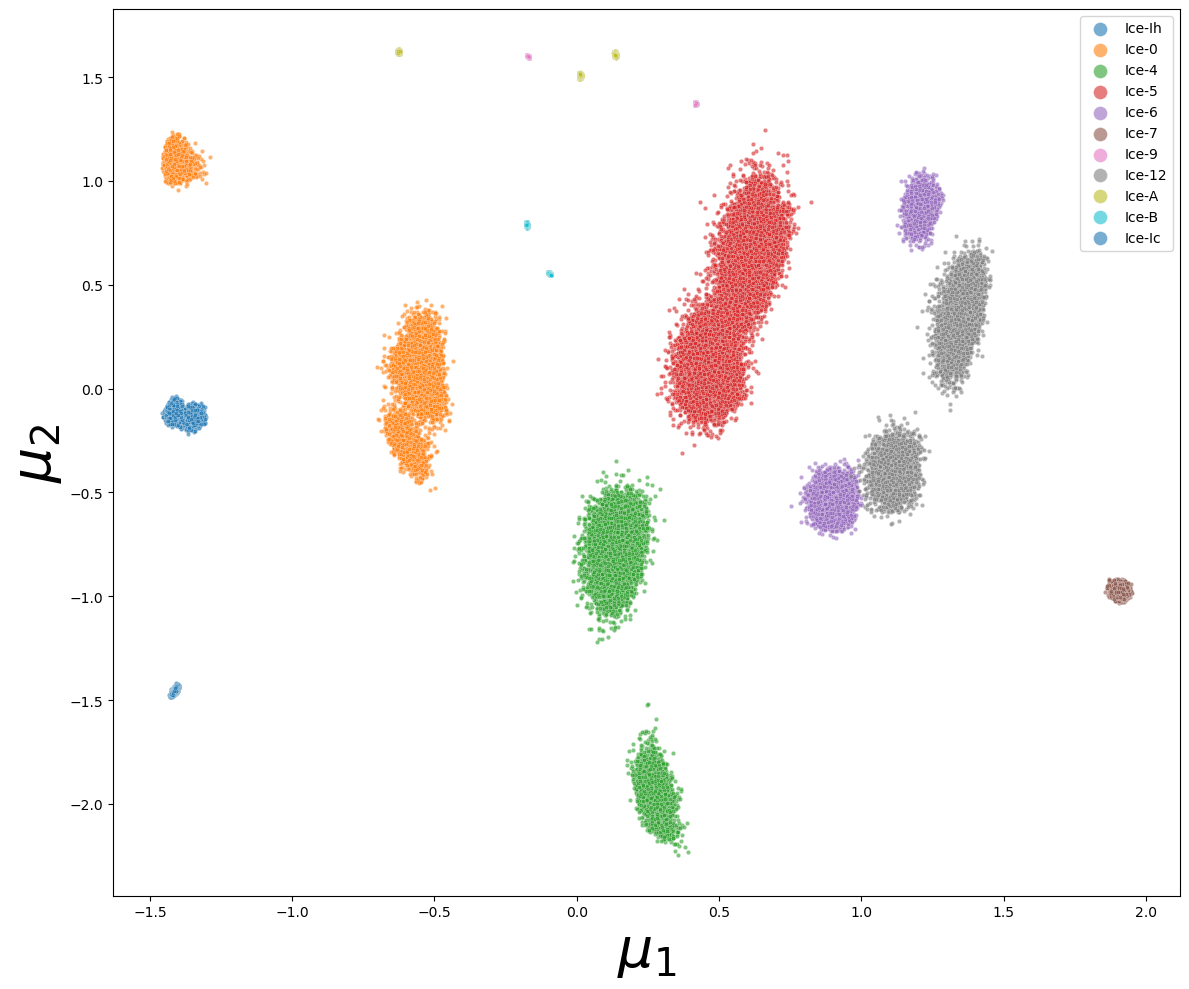

In [67]:
plt.figure(figsize = [12,10])
labels = ["Ice-Ih", "Ice-0", "Ice-4", "Ice-5", "Ice-6", "Ice-7", "Ice-9", "Ice-12", "Ice-A", "Ice-B", "Ice-Ic"]
for i in range(11):
    color = np.array(color_list)
    #if i not in [1,4,5,6,7]:
    sns.scatterplot(x = pyvTrain1[:,0][color==i], y = pyvTrain1[:,1][color==i], s = 10, label = labels[i], alpha = 0.6)
#sns.scatterplot(x = pyvTest[:,0], y = pyvTest[:,1], s = 10, label = "test6", alpha = 0.6)
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])
plt.xlabel(r"$\mu_1$", fontsize = 40)
plt.ylabel(r"$\mu_2$", fontsize = 40)
plt.tight_layout()

In [20]:
# Some plotting config...
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
def setPlotParams():
    plt.rc("axes",linewidth=1.5)
    plt.rc("legend",fontsize=18,frameon=False)
    plt.rcParams['text.usetex'] = False
    plt.rcParams['font.size'] = 20
    plt.rcParams['font.family'] = "serif"
    tdir = 'in'
    #sns.set_context(rc = {'patch.linewidth': 2.0, 'patch.linecolor':'black'})
    major = 10.0
    minor = 6.0 
    plt.rcParams['xtick.direction'] = tdir
    plt.rcParams['ytick.direction'] = tdir
    plt.rcParams['xtick.major.size'] = major
    plt.rcParams['xtick.minor.size'] = minor
    plt.rcParams['ytick.major.size'] = major
    plt.rcParams['ytick.minor.size'] = minor
setPlotParams()

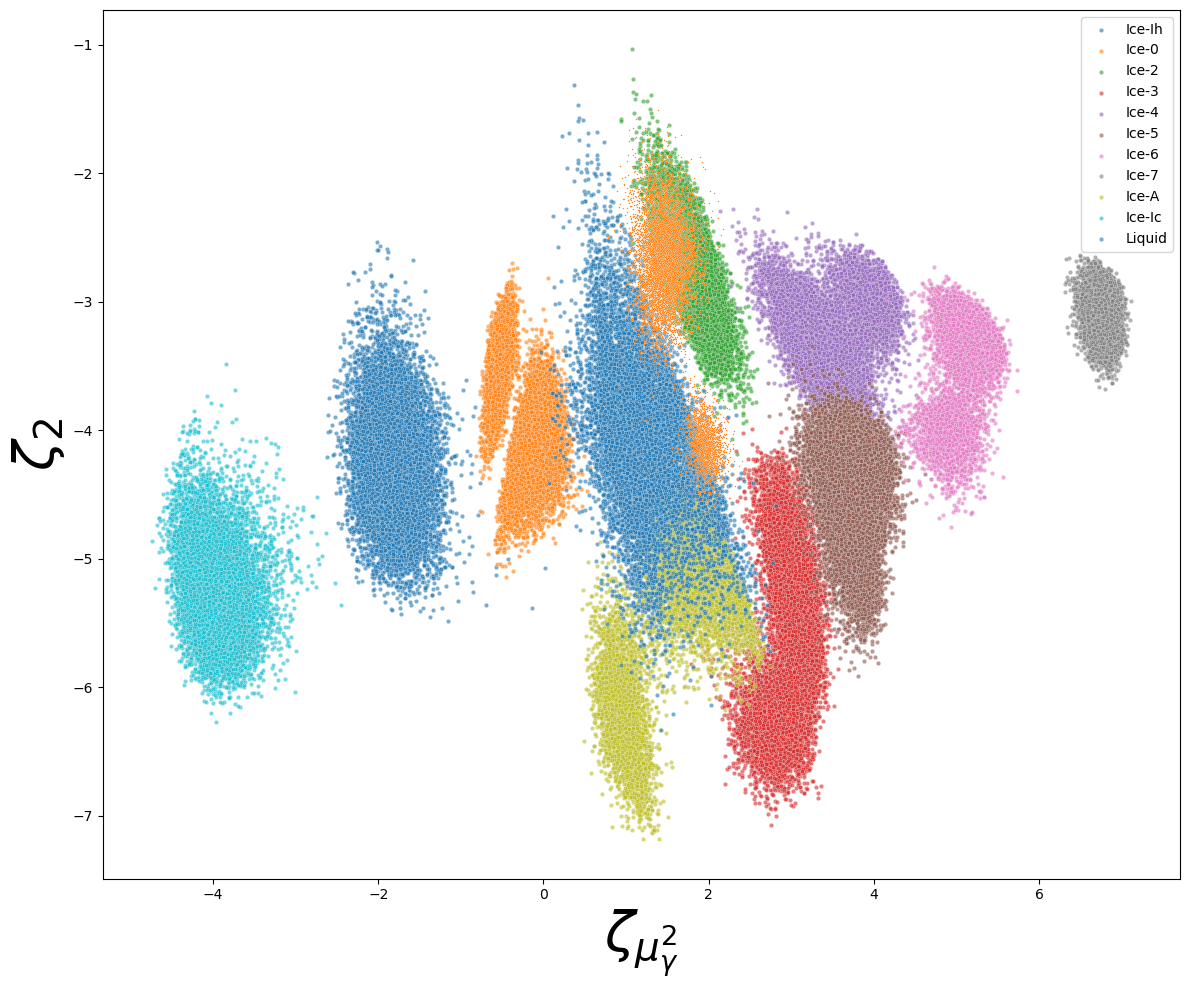

In [45]:
plt.figure(figsize = [12,10])
pyTrain0 = pyenc.encoder(torch.Tensor(fit_data).to('cuda')).detach().to('cpu').to().numpy()
labels = ["Ice-Ih", "Ice-0", "Ice-2", "Ice-3", "Ice-4", "Ice-5", "Ice-6", "Ice-7", "Ice-9", "Ice-12", "Ice-A", "Ice-B", "Ice-Ic", "Liquid"]
for i in [0,1,2,3,4, 5, 6,7, 10, 12, 13]:
    color = np.array(color_list)
    #if i not in [1,4,5,6,7]:
    sns.scatterplot(x = pyTrain0[:,0][color==i], y = pyTrain0[:,1][color==i], s = 10, label = labels[i], alpha = 0.6)
lgnd = plt.legend()
sns.scatterplot(x= dataih[:,0], y = dataih[:,1], s = 1)
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])
plt.xlabel("$\zeta_{\mu^2_\gamma}$", fontsize = 40)
plt.ylabel("$\zeta_2$", fontsize = 40)
plt.tight_layout()

In [55]:
color_list[-1]

9.0

In [248]:
pycvTrain0 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[0].detach().to('cpu').to().numpy()
pycvTrain1 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[1].detach().to('cpu').to().numpy()
pycvTrain2 = autoenc.encode(torch.Tensor(fit_data).to('cuda'))[2].detach().to('cpu').to().numpy()

/tmp/ipykernel_103105/3738683537.py:5: RuntimeWarning:

invalid value encountered in log



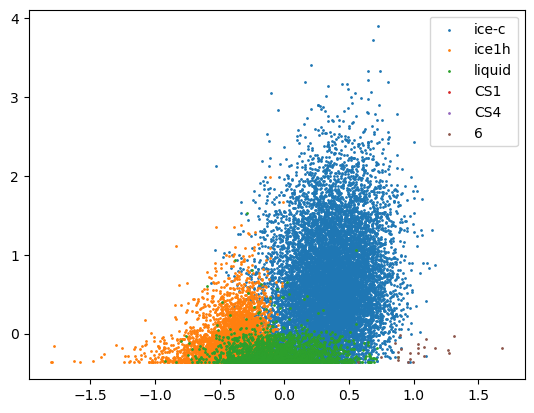

In [277]:
labels = ["ice-c", "ice1h", "liquid", "SH", "11", "CS1", "CS2", "CS4", "0", "6"]
for i in [0,1,2,5,7,9]:
    color = np.array(color_list)
    #if i not in [1,4,5,6]:
    plt.scatter(pycvTrain1[:,0][color==i]*np.log(pycvTrain0[:,0][color==i]), pycvTrain0[:,1][color==i]*np.log(pycvTrain0[:,1][color==i]), s = 1, label = labels[i])
plt.legend()
#plt.ylim(-10,10)

In [33]:
testice1h = gmx.read_gromacs("../../Sample_Structures/Inherent/ice1h/ice1h.gro")
del testice1h[[atom.symbol=="W" for atom in testice1h]] 
#testliquid = gmx.read_gromacs("../../Sample_Structures/Ice/testliquid.gro")
#del testliquid[[atom.symbol=="W" for atom in testliquid]] 
testice1c = gmx.read_gromacs("../../Sample_Structures/Inherent/ice1c/ice1c.gro")
del testice1c[[atom.symbol=="W" for atom in testice1c]] 
testice0 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice0/ice0.gro")
del testice0[[atom.symbol=="W" for atom in testice0]] 
#testice2 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice2/ice2.gro")
#del testice2[[atom.symbol=="W" for atom in testice2]] 
#testice3 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice3/ice3.gro")
#del testice3[[atom.symbol=="W" for atom in testice3]] 
testice4 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice4/ice4.gro")
del testice4[[atom.symbol=="W" for atom in testice4]] 
testice5 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice5/ice5.gro")
del testice5[[atom.symbol=="W" for atom in testice5]] 
testice6 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice6/ice6.gro")
del testice6[[atom.symbol=="W" for atom in testice6]] 
testice7 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice7/ice7.gro")
del testice7[[atom.symbol=="W" for atom in testice7]] 
testice9 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice9/ice9.gro")
del testice9[[atom.symbol=="W" for atom in testice9]] 
testice12 = gmx.read_gromacs("../../Sample_Structures/Inherent/ice12/ice12.gro")
del testice12[[atom.symbol=="W" for atom in testice12]] 
testiceA = gmx.read_gromacs("../../Sample_Structures/Inherent/iceA/iceA.gro")
del testiceA[[atom.symbol=="W" for atom in testiceA]] 
testiceB = gmx.read_gromacs("../../Sample_Structures/Inherent/iceB/iceB.gro")
del testiceB[[atom.symbol=="W" for atom in testiceB]] 

In [34]:
testsoap_ih = soap.create(testice1h, positions=np.arange(0,len(testice1h),3),n_jobs = -1)
testsoap_ic = soap.create(testice1c, positions=np.arange(0,len(testice1c),3),n_jobs = -1)
testsoap_lq = soap.create(liquid, positions=np.arange(0,len(liquid),3),n_jobs = -1)
testsoap_0 = soap.create(testice0, positions=np.arange(0,len(testice0),3),n_jobs = -1)
#testsoap_2 = soap.create(testice2, positions=np.arange(0,len(testice2),3),n_jobs = -1)
#testsoap_3 = soap.create(testice3, positions=np.arange(0,len(testice3),3),n_jobs = -1)
testsoap_4 = soap.create(testice4, positions=np.arange(0,len(testice4),3),n_jobs = -1)
testsoap_5 = soap.create(testice5, positions=np.arange(0,len(testice5),3),n_jobs = -1)
testsoap_6 = soap.create(testice6, positions=np.arange(0,len(testice6),3),n_jobs = -1)
testsoap_7 = soap.create(testice7, positions=np.arange(0,len(testice7),3),n_jobs = -1)
testsoap_9 = soap.create(testice9, positions=np.arange(0,len(testice9),3),n_jobs = -1)
testsoap_12 = soap.create(testice12, positions=np.arange(0,len(testice12),3),n_jobs = -1)
testsoap_A = soap.create(testiceA, positions=np.arange(0,len(testiceA),3),n_jobs = -1)
testsoap_B = soap.create(testiceB, positions=np.arange(0,len(testiceB),3),n_jobs = -1)

In [62]:
test6 = Scaler.fit_transform(np.concatenate([soap_6]))
#data6 = pyenc.encoder(torch.Tensor(testih).to('cuda')).detach().to('cpu').to().numpy()

In [46]:
testsoap_ih

array([[ 0.05179912,  0.04310948,  0.92937903, ...,  1.13171828,
        -1.02352796,  0.95314664],
       [ 0.05183148,  0.04327123,  0.92816822, ...,  1.19254604,
        -1.09274808,  1.03057897],
       [ 0.0515904 ,  0.04341979,  0.92181889, ...,  1.19189134,
        -1.11306699,  1.07017159],
       ...,
       [ 0.05146039,  0.04188023,  0.92415757, ...,  1.21532597,
        -1.13136454,  1.0801326 ],
       [ 0.05159882,  0.04288667,  0.92595772, ...,  1.15759372,
        -1.08038995,  1.03857609],
       [ 0.05170822,  0.04336525,  0.92599785, ...,  1.16879133,
        -1.10182403,  1.06648851]])

<AxesSubplot:ylabel='Density'>

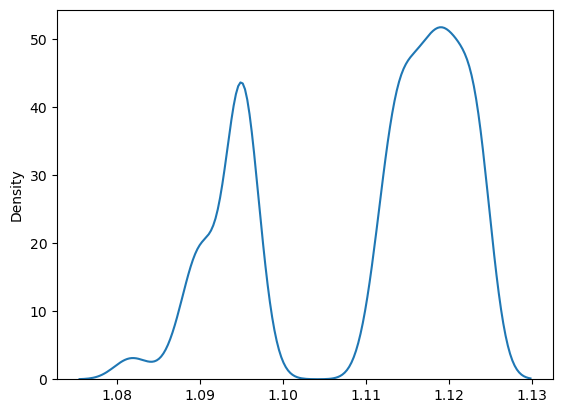

In [72]:
kdeplot(testsoap_9[:,2])